# Feature selection

## summary
To predict the severity of accident, we have to do the feature selection first. The purpose of feature selection is to get rid of the unuseful data, and remain the data which contains the most information. This procedure can help us eliminate the noise of the data and reduce the computation time.

### 1. Obtaining and Viewing the Data

In [1]:
# import the toolkits
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import MaxNLocator
from itertools import compress

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

#### Accident 2015-2019

In [2]:
accidents = pd.concat([pd.read_csv(f, compression='zip', 
                                   low_memory=False) for f in glob.glob('data/*Accidents*.zip')])
print('Records:', accidents.shape[0], '\nColumns:', accidents.shape[1])
accidents.head(3)

Records: 646830 
Columns: 32


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,0,1,4,2,2,0,0,1,1,E01002833


#### Vehicles 2015-2019

In [3]:
vehicles = pd.concat([pd.read_csv(f, compression='zip') for f in glob.glob('data/*Vehicles*.zip')], 
                     sort=True)
print('Records:', vehicles.shape[0], '\nColumns:', vehicles.shape[1])
vehicles.head(3)

Records: 1192061 
Columns: 23


,1st_Point_of_Impact,Accident_Index,Age_Band_of_Driver,Age_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_(CC),Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,...,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_IMD_Decile,Vehicle_Leaving_Carriageway,Vehicle_Location-Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive?
0,3,201506E098757,7,45,11,1,-1,1794,0,0,...,1,0,0,-1,0,0,18,2,9,1
1,4,201506E098766,5,25,1,-1,-1,1582,0,0,...,2,0,0,-1,0,0,9,1,9,1
2,1,201506E098766,8,51,-1,1,-1,-1,0,0,...,1,0,0,-1,0,0,18,2,9,1


### 2. Feature selection

#### Disposable columns
Drop variables that official website didn't explain, couldn't be acquired before the accident happened, and aren't useful. In reality, it is useful to be able to predict severity before an accident happens.

In [4]:
# Drop column we don't need
accidents = accidents.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 
                            'Latitude', 'Number_of_Vehicles', 'Number_of_Casualties',
                            'Police_Force', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
                            '1st_Road_Number', '2nd_Road_Number', 'LSOA_of_Accident_Location',
                            'Did_Police_Officer_Attend_Scene_of_Accident'],1)


vehicles = vehicles.drop(['Vehicle_Reference', 'Age_Band_of_Driver', 'Driver_Home_Area_Type',
                          'Skidding_and_Overturning', 'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway',
                          'Hit_Object_off_Carriageway', '1st_Point_of_Impact'],1)

In [5]:
# merging data
df = pd.merge(accidents, 
              vehicles,
              on='Accident_Index', how='inner')

#### Handling missing value
The data contain some informations that are lost, this would affect the result of prediction. I drop the variables contain more
than 30% of missing value and the samples which contain any of missing data.

In [6]:
# Handling missing value
for column in df.columns:
    missing_number = (df[column] == -1).sum()
    sum_of_number = df[column].shape[0]
    if (missing_number/sum_of_number) > 0.3:
        df.drop([column], 1, inplace=True)
        print('column has been dropped: ' ,column)
        
df = df.replace(-1, np.NaN)
df = df.dropna()
df.info()

column has been dropped:  Junction_Control
column has been dropped:  2nd_Road_Class
column has been dropped:  Driver_IMD_Decile
column has been dropped:  Vehicle_IMD_Decile
<class 'pandas.core.frame.DataFrame'>
Int64Index: 676042 entries, 2 to 1028220
Data columns (total 29 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Accident_Index                           676042 non-null  object 
 1   Accident_Severity                        676042 non-null  int64  
 2   Date                                     676042 non-null  object 
 3   Day_of_Week                              676042 non-null  int64  
 4   Time                                     676042 non-null  object 
 5   1st_Road_Class                           676042 non-null  int64  
 6   Road_Type                                676042 non-null  float64
 7   Speed_limit                              676042 non-null  float64
 8   

#### VarianceThreshold 
In feature selection field, the feature with 0 variance is unuseful, beacuase the values are all the same. And only the feature that have a certain number of varaince can help to improve model. Here, I use VarianceThreshold from sklearn to drop feature whose variance less than 0.2.

In [7]:
from sklearn.feature_selection import VarianceThreshold

In [8]:
# seperate data type
goal_col = ['Accident_Index', 'Accident_Severity']

datetime_col = ['Date', 'Time']

num_col = ['Age_of_Driver', 'Age_of_Vehicle', 'Engine_Capacity_(CC)']

cat_col = [x for x in list(df.columns) if x not in goal_col+datetime_col+num_col]

In [9]:
# find the variable whose varience is too low 
threshold = 0.2
df_var = df[num_col + cat_col]
sel = VarianceThreshold(threshold)
sel.fit_transform(df_var)
low_variance_list = df_var.columns[~sel.get_support()].tolist()

print('low variance columns:', low_variance_list)

low variance columns: ['Pedestrian_Crossing-Human_Control', 'Towing_and_Articulation', 'Was_Vehicle_Left_Hand_Drive?']


In [10]:
# drop features
cat_col = [x for x in cat_col if x not in low_variance_list]

In [11]:
len(cat_col)

19

#### Pearson's correlation in numerical features

Find numerical features that are highly correlated. If they were, we should choose only one of it. Result shows that there are no multicollinearity (no coefficient above 0.5).

<AxesSubplot:>

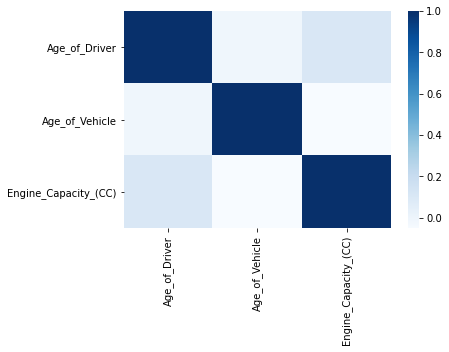

In [12]:
sns.heatmap(df[num_col].corr(), cmap="Blues")

In [19]:
df[num_col].corr()

,Age_of_Driver,Age_of_Vehicle,Engine_Capacity_(CC)
Age_of_Driver,1.000000,-0.008347,0.108701
Age_of_Vehicle,-0.008347,1.000000,-0.051534
Engine_Capacity_(CC),0.108701,-0.051534,1.000000


#### Chi-square method for categorical features

Use Chi-square scores to select categorical features, the higher the scores means the feature is more relevant to target. 
To set the threshold of scores, I calculate the gradients of ordered nearby scores, the first highest gradient means that 
the features before it are way too much relevant.

In [13]:
# import functions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [14]:
# define feature selection
fs = SelectKBest(score_func=chi2, k='all')
# apply feature selection
fs.fit(df[cat_col], df['Accident_Severity'])
score = np.sort(fs.scores_)

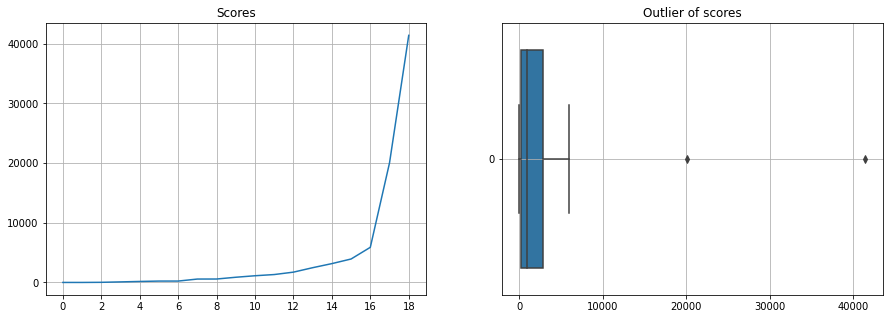

In [15]:
# plot ordered scores
f, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].plot(score)
axes[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axes[0].set_title('Scores')
axes[0].grid()
sns.boxplot(orient='h', data=score, ax=axes[1])
axes[1].set_title('Outlier of scores')
axes[1].grid()

In [16]:
# drop value over 10000
score = score[score < 10000]

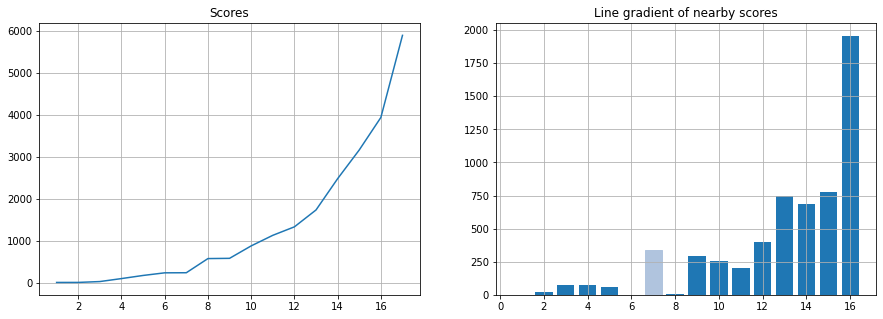

In [17]:
# plot ordered scores
f, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].plot(np.arange(1,18), score)
axes[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axes[0].set_title('Scores')
axes[0].grid()
# calcaulate the gradient of nearby features
score_diff = np.diff(score)

# plot gradient scores
bar = axes[1].bar(np.arange(1,17), score_diff)
bar[6].set_color('lightsteelblue')
axes[1].set_title('Line gradient of nearby scores')
axes[1].grid()

In [18]:
# define feature selection
fs = SelectKBest(score_func=chi2, k=12)
# apply feature selection
fs.fit(df[cat_col], df['Accident_Severity'])
cat_col = list(compress(cat_col, fs.get_support()))

cat_col

['1st_Road_Class',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Urban_or_Rural_Area',
 'Junction_Location',
 'Sex_of_Driver',
 'Vehicle_Location-Restricted_Lane',
 'Vehicle_Manoeuvre',
 'Vehicle_Type']